In [5]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts
import run_expts


from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample
import seaborn as sns

from scipy.signal import welch
import yasa
import constants
import numpy as np

#PCA Imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [98]:
plt

<module 'matplotlib.pyplot' from '/user/home/ko20929/.conda/envs/sktime_latest/lib/python3.11/site-packages/matplotlib/pyplot.py'>

## PCA Explained Variance

<Figure size 640x480 with 0 Axes>

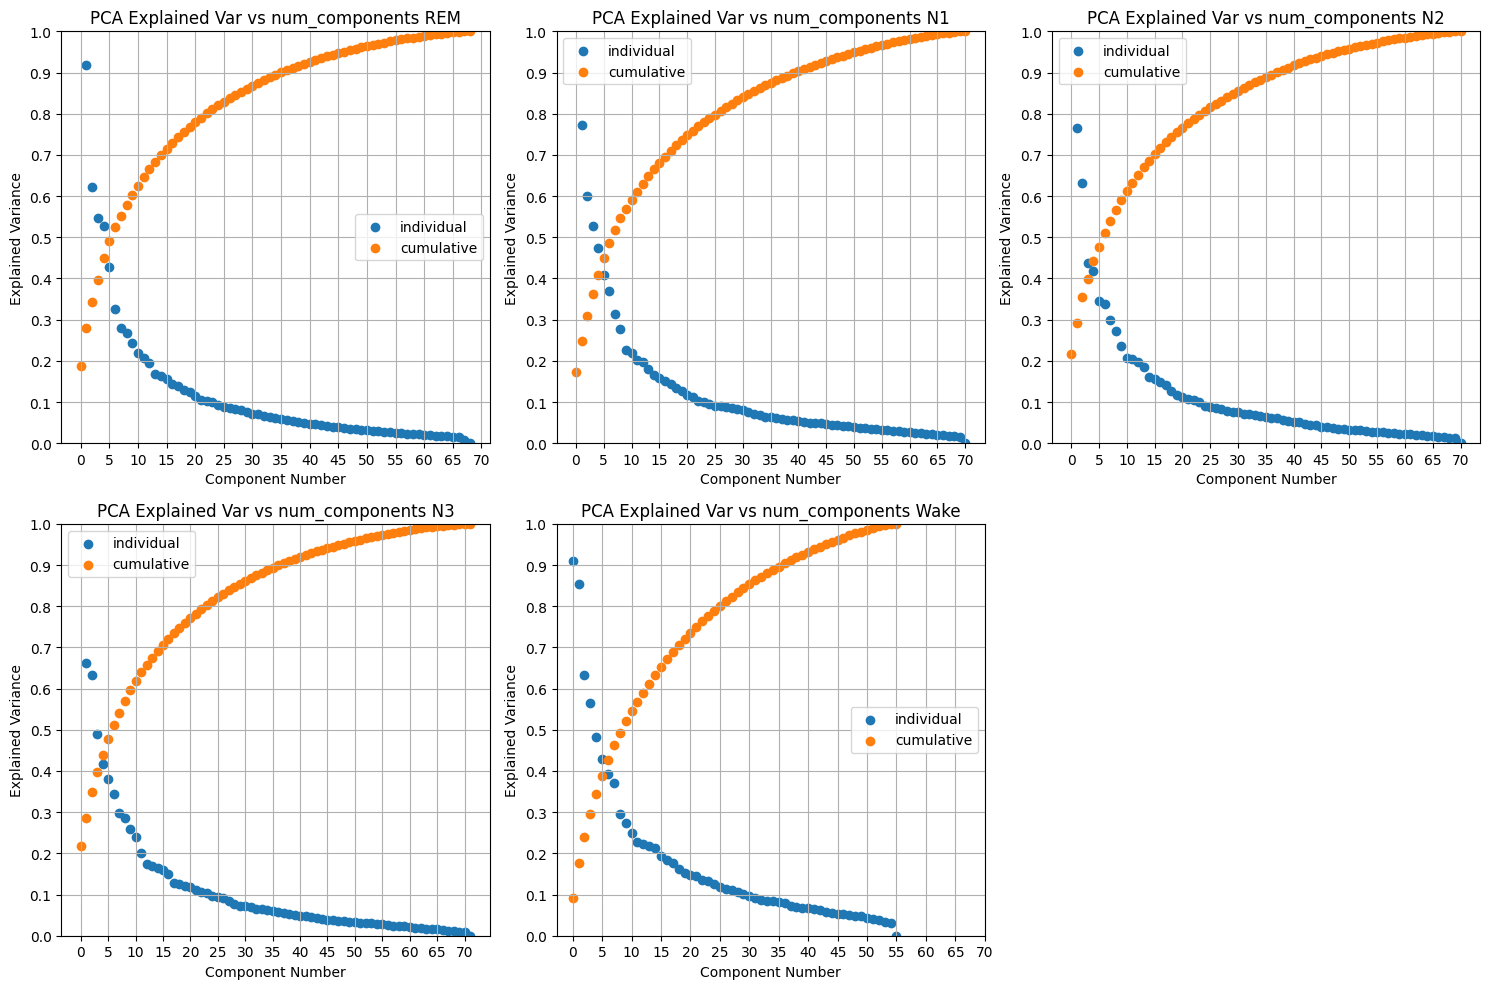

In [100]:
#Plot the graphs for all data types
fig = plt.figure()
fig = plt.figure(figsize=(15,10),dpi=100)

for i, data_type in enumerate(['REM', 'N1', 'N2', 'N3', 'Wake']):
    power_bands = {'delta' : (0.5,4) , 'theta' : (4,8) , 'alpha' : (8,12) , 'sigma' : (12,16) , 'beta' : (16,30) , 'gamma' : (30,40) }
    power_band_names = [val for val in power_bands.keys()]
    folder = '/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/Connectivity/'
    X = pd.read_hdf(folder + data_type+ '_coherence_df.h5')
    X = X.reset_index(drop = True)
    y = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_y.h5')
    groups = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_groups.h5')
    
    std_scaler = StandardScaler()
    scaled_df = std_scaler.fit_transform(X)
    
    pca = PCA()
    pca.fit_transform(scaled_df)
    
    ax = fig.add_subplot(2,3,i+1)
    
    plt.title('PCA Explained Var vs num_components ' + data_type)
    
    plt.scatter([i for i in range(len(pca.explained_variance_ratio_))], pca.explained_variance_ratio_*10 , label = 'individual')
    plt.scatter([i for i in range(len(pca.explained_variance_ratio_))], [pca.explained_variance_ratio_[:i+1].sum() for i in range(len(pca.explained_variance_ratio_))], label = 'cumulative')
    plt.ylim(0,1)
    ax.set_yticks(np.linspace(0,1,11))
    ax.set_xticks(np.linspace(0,70,15))
    ax.set_ylabel('Explained Variance')
    ax.set_xlabel('Component Number')
    plt.grid()
    plt.legend()
    
    plt.tight_layout()

## PCA Clustering (two components)

<Figure size 640x480 with 0 Axes>

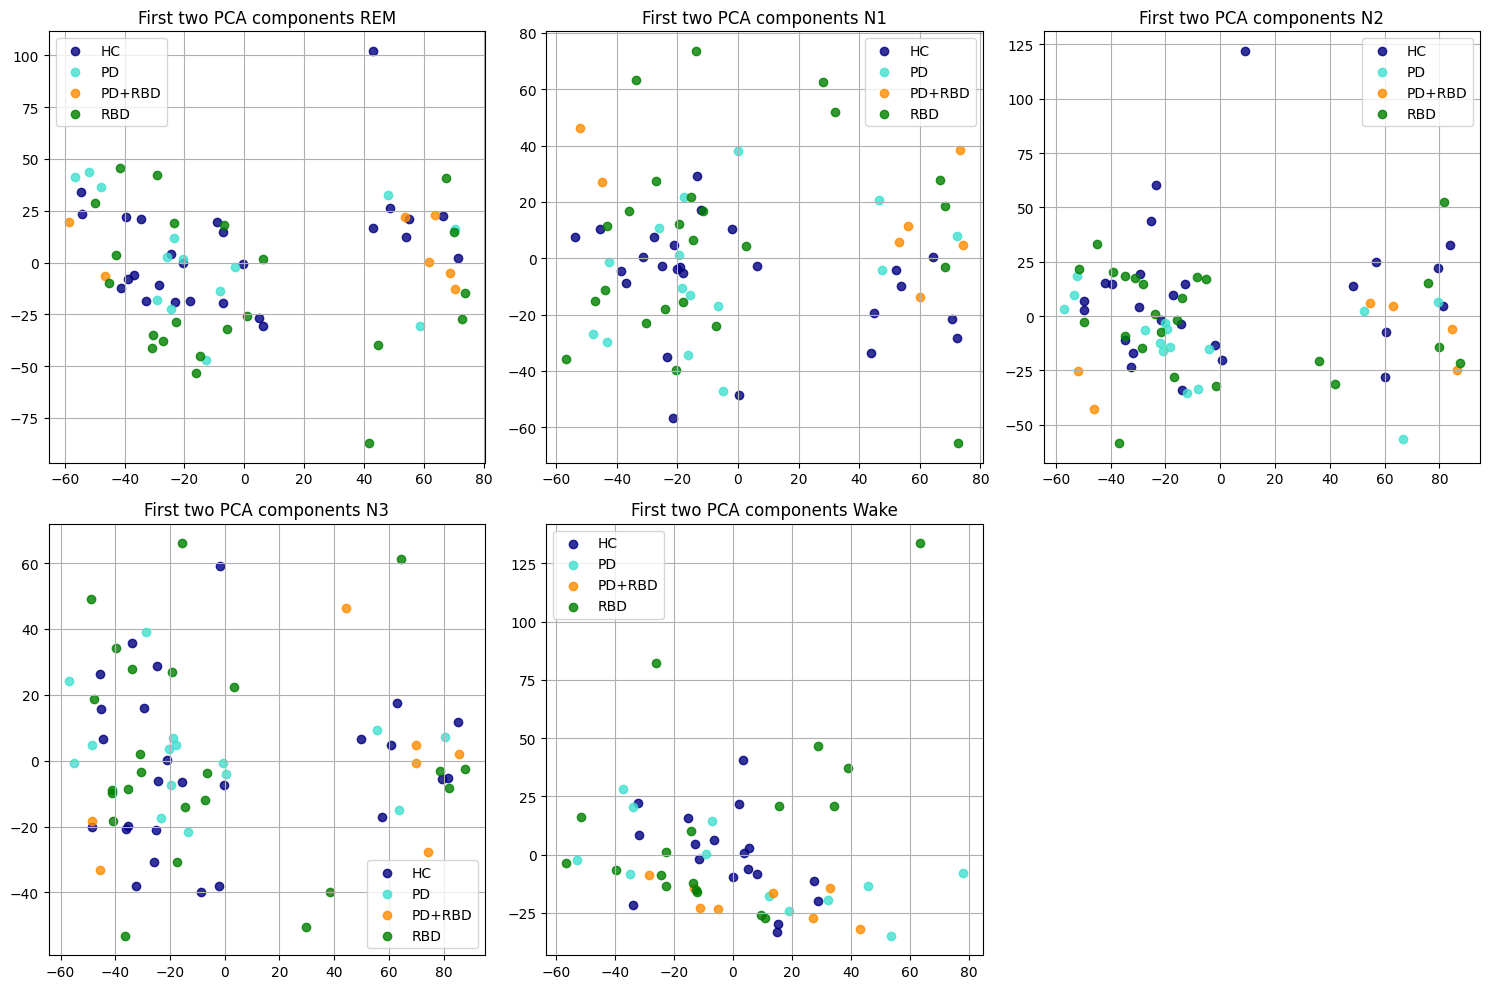

In [61]:
#Plot the graphs for all data types
fig = plt.figure()
fig = plt.figure(figsize=(15,10),dpi=100)

colors =  ['navy', 'turquoise', 'darkorange', 'green']
target_names = ['HC' , 'PD' , 'PD+RBD', 'RBD'] 

for i, data_type in enumerate(['REM', 'N1', 'N2', 'N3', 'Wake']):
    power_bands = {'delta' : (0.5,4) , 'theta' : (4,8) , 'alpha' : (8,12) , 'sigma' : (12,16) , 'beta' : (16,30) , 'gamma' : (30,40) }
    power_band_names = [val for val in power_bands.keys()]
    folder = '/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/Connectivity/'
    X = pd.read_hdf(folder + data_type+ '_coherence_df.h5')
    X = X.reset_index(drop = True)
    y = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_y.h5')
    groups = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_groups.h5')
    
    std_scaler = StandardScaler()
    scaled_df = std_scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(scaled_df)
    
    ax = fig.add_subplot(2,3,i+1)
    
    plt.title('First two PCA components ' + data_type)

    for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, label=target_name)
        plt.legend()
    
    plt.grid()
    
    plt.tight_layout()

## PCA Clustering three components

<Figure size 640x480 with 0 Axes>

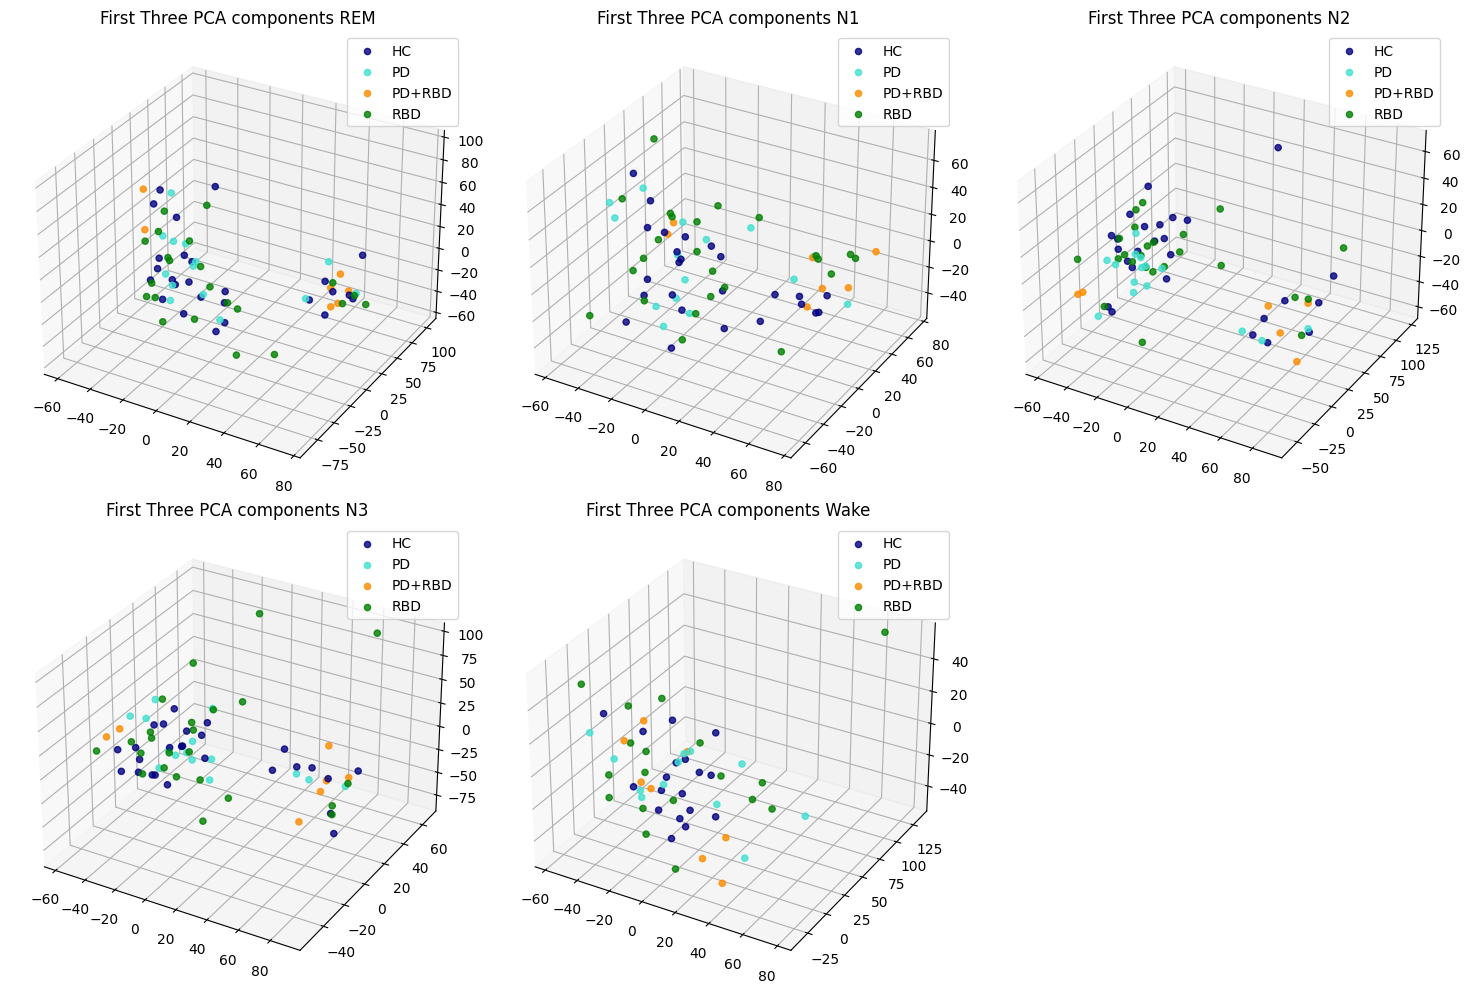

In [86]:
#Plot the graphs for all data types
fig = plt.figure()
fig = plt.figure(figsize=(15,10),dpi=100)

colors =  ['navy', 'turquoise', 'darkorange', 'green']
target_names = ['HC' , 'PD' , 'PD+RBD', 'RBD'] 

for i, data_type in enumerate(['REM', 'N1', 'N2', 'N3', 'Wake']):
    power_bands = {'delta' : (0.5,4) , 'theta' : (4,8) , 'alpha' : (8,12) , 'sigma' : (12,16) , 'beta' : (16,30) , 'gamma' : (30,40) }
    power_band_names = [val for val in power_bands.keys()]
    folder = '/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/Connectivity/'
    X = pd.read_hdf(folder + data_type+ '_coherence_df.h5')
    X = X.reset_index(drop = True)
    y = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_y.h5')
    groups = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_groups.h5')
    
    std_scaler = StandardScaler()
    scaled_df = std_scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(scaled_df)
    
    ax = fig.add_subplot(2,3,i+1, projection='3d')
    
    plt.title('First Three PCA components ' + data_type)

    for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
        ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1],X_pca[y == i, 2], color=color, alpha=0.8, label=target_name)
        plt.legend()
    
    plt.grid()
    
    plt.tight_layout()

## LDA 2-D Clustering

<Figure size 640x480 with 0 Axes>

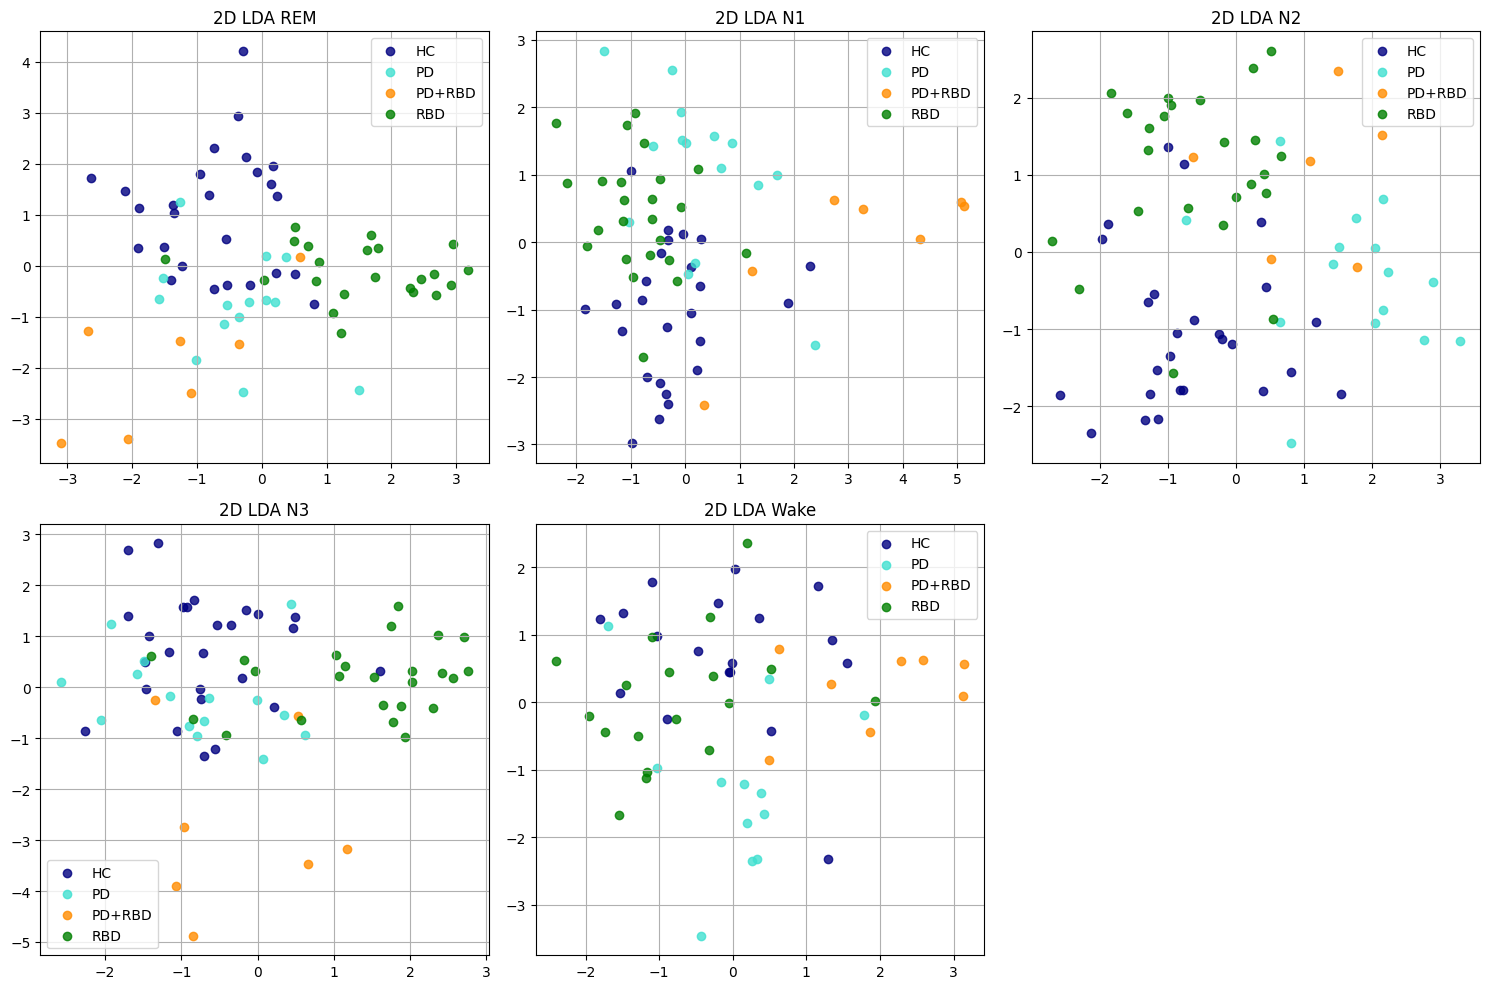

In [85]:
#Plot the graphs for all data types
fig = plt.figure()
fig = plt.figure(figsize=(15,10),dpi=100)

colors =  ['navy', 'turquoise', 'darkorange', 'green']
target_names = ['HC' , 'PD' , 'PD+RBD', 'RBD'] 

for i, data_type in enumerate(['REM', 'N1', 'N2', 'N3', 'Wake']):
    power_bands = {'delta' : (0.5,4) , 'theta' : (4,8) , 'alpha' : (8,12) , 'sigma' : (12,16) , 'beta' : (16,30) , 'gamma' : (30,40) }
    power_band_names = [val for val in power_bands.keys()]
    folder = '/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/Connectivity/'
    X = pd.read_hdf(folder + data_type+ '_coherence_df.h5')
    X = X.reset_index(drop = True)
    y = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_y.h5')
    groups = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_groups.h5')
    
    std_scaler = StandardScaler()
    scaled_df = std_scaler.fit_transform(X)
    
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_r2 = lda.fit(X, y).transform(X)
    
    ax = fig.add_subplot(2,3,i+1)
    
    plt.title('2D LDA ' + data_type)

    for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
        plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=0.8, label=target_name)
        plt.legend()
    
    plt.grid()
    
    plt.tight_layout()

## LDA 3-D Clustering

<Figure size 640x480 with 0 Axes>

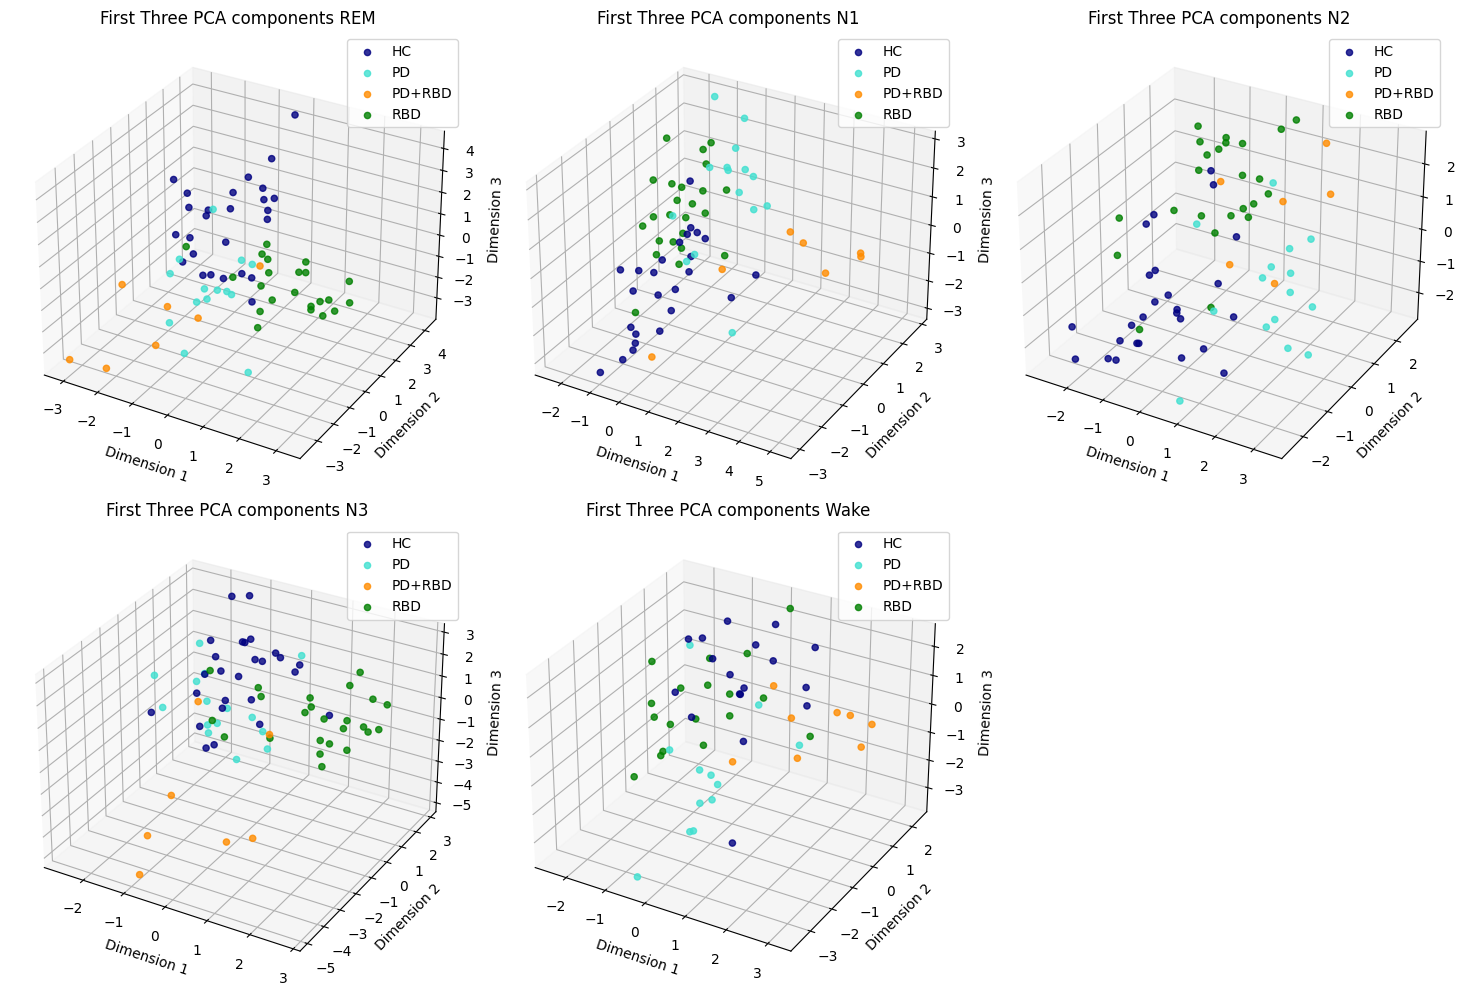

In [92]:
#Plot the graphs for all data types
fig = plt.figure()
fig = plt.figure(figsize=(15,10),dpi=100)

colors =  ['navy', 'turquoise', 'darkorange', 'green']
target_names = ['HC' , 'PD' , 'PD+RBD', 'RBD'] 

for i, data_type in enumerate(['REM', 'N1', 'N2', 'N3', 'Wake']):
    power_bands = {'delta' : (0.5,4) , 'theta' : (4,8) , 'alpha' : (8,12) , 'sigma' : (12,16) , 'beta' : (16,30) , 'gamma' : (30,40) }
    power_band_names = [val for val in power_bands.keys()]
    folder = '/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/Connectivity/'
    X = pd.read_hdf(folder + data_type+ '_coherence_df.h5')
    X = X.reset_index(drop = True)
    y = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_y.h5')
    groups = pd.read_hdf('/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/' + data_type + '_groups.h5')
    
    std_scaler = StandardScaler()
    scaled_df = std_scaler.fit_transform(X)

    lda = LinearDiscriminantAnalysis(n_components=3)
    X_r3 = lda.fit(X, y).transform(X)
    
    ax = fig.add_subplot(2,3,i+1, projection='3d')
    
    plt.title('First Three PCA components ' + data_type)

    for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
        ax.scatter(X_r3[y == i, 0], X_r3[y == i, 1], X_r3[y == i, 1], color=color, alpha=0.8, label=target_name)
        plt.legend()
        
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    
    plt.grid()
    
    plt.tight_layout()

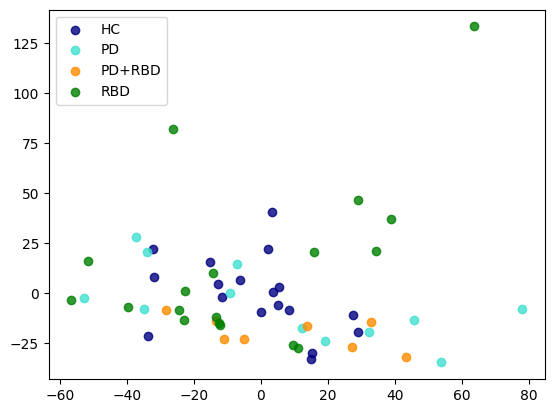

In [47]:
#class_label_dict = {'HC': 0 , 'PD' : 1 , 'PD+RBD' : 2 , 'RBD' : 3} #Dictionary used to label the classes for reference




for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, label=target_name)
    plt.legend()

In [52]:
from mpl_toolkits.mplot3d import Axes3D

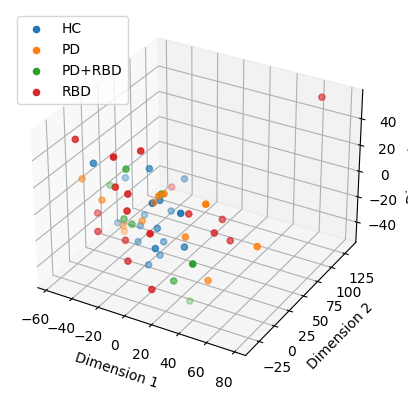

In [91]:
# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2] , label = target_name)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.legend()